In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
results = pd.read_table('results.out', sep=' ',header=0)

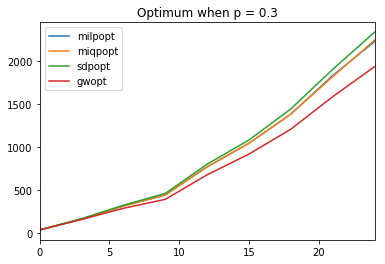

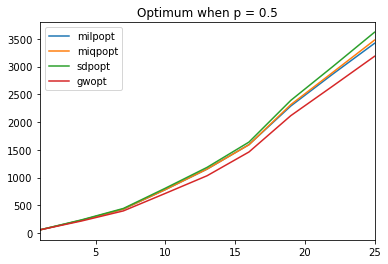

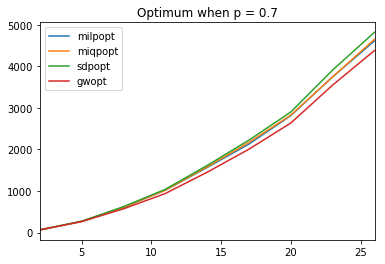

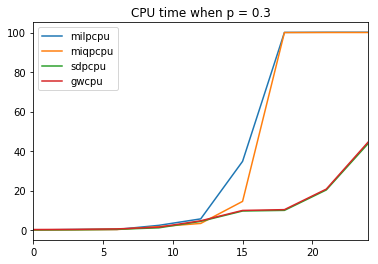

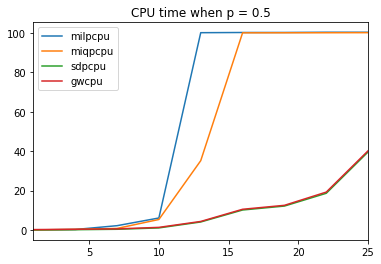

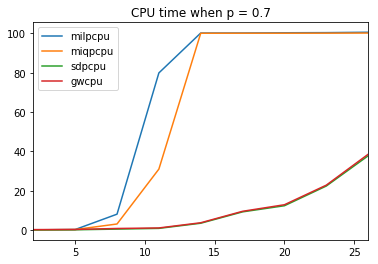

In [28]:
results[results['p']==0.3][['milpopt','miqpopt','sdpopt','gwopt']].plot()
plt.title('Optimum when p = 0.3')
results[results['p']==0.5][['milpopt','miqpopt','sdpopt','gwopt']].plot()
plt.title('Optimum when p = 0.5')
results[results['p']==0.7][['milpopt','miqpopt','sdpopt','gwopt']].plot()
plt.title('Optimum when p = 0.7')

results[results['p']==0.3][['milpcpu','miqpcpu','sdpcpu','gwcpu']].plot()
plt.title('CPU time when p = 0.3')
results[results['p']==0.5][['milpcpu','miqpcpu','sdpcpu','gwcpu']].plot()
plt.title('CPU time when p = 0.5')
results[results['p']==0.7][['milpcpu','miqpcpu','sdpcpu','gwcpu']].plot()
plt.title('CPU time when p = 0.7')